In [1]:
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
csv_file = "rl_game_arena_data.csv"

In [5]:
df = pd.read_csv(csv_file, index_col=0)

In [18]:
df = df.drop_duplicates()


In [19]:
df.reset_index(drop=True, inplace=True)


In [21]:
df

,team_points,opponent_points,elapsed_time
0,447.0,1123.0,1346.8486
1,379.0,1191.0,1382.9027
2,437.0,1133.0,1582.5502
3,516.0,1054.0,1353.7071
4,423.0,1147.0,1424.1700
5,467.0,1103.0,1332.9925


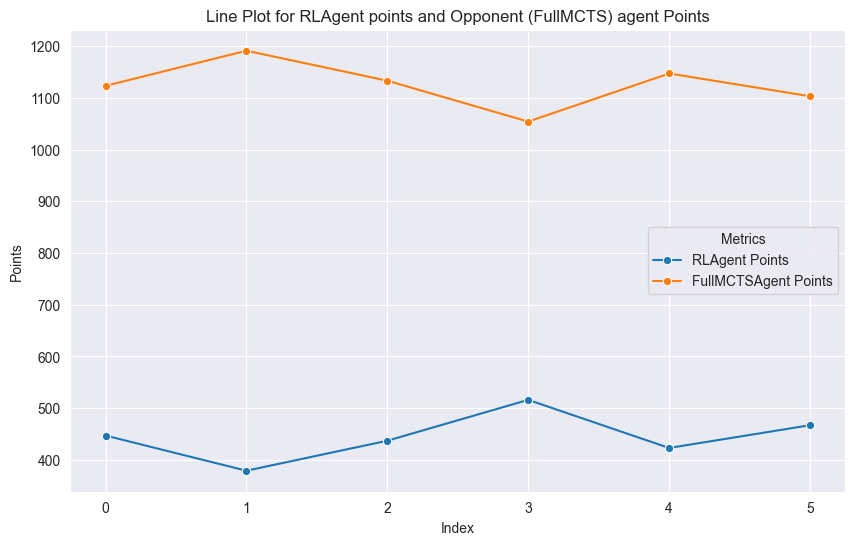

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="team_points", label="RLAgent Points", marker="o")
sns.lineplot(data=df, x=df.index, y="opponent_points", label="FullMCTSAgent Points", marker="o")

plt.title("Line Plot for RLAgent points and Opponent (FullMCTS) agent Points")
plt.xlabel("Index")
plt.ylabel("Points")
plt.legend(title="Metrics")
plt.grid(True)

plt.show()

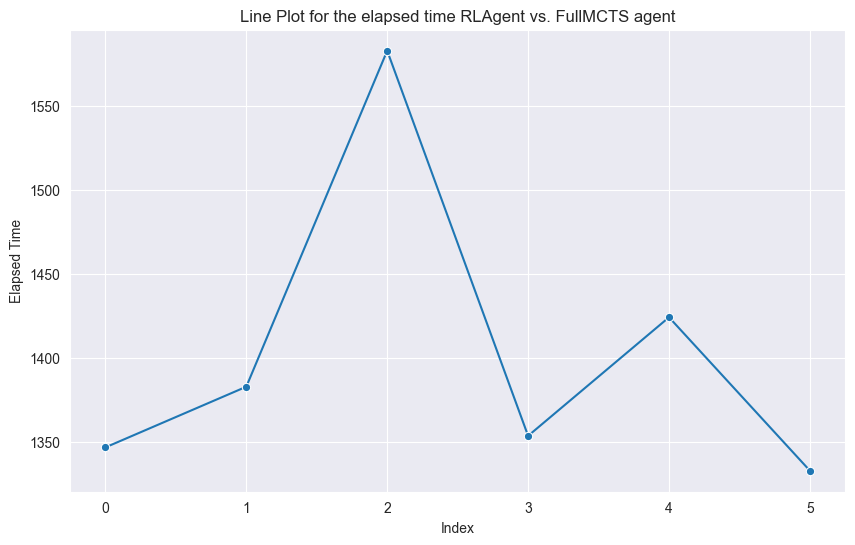

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="elapsed_time", marker="o")

plt.title("Line Plot for the elapsed time RLAgent vs. FullMCTS agent")
plt.xlabel("Index")
plt.ylabel("Elapsed Time")
plt.grid(True)

plt.show()